<a href="https://colab.research.google.com/github/CiroGomess/speedrun/blob/master/projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import requests, json, time

Carregando o arquivo do dataset gerado no processo de consulta e tratamento dos dados recebidos da API que se referem as runs

In [ ]:
raw_df = pd.read_csv('raw-dataset.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,69,70,71,72,73,74,75,76,79,80,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
raw_df

,Unnamed: 0,id,weblink,game,level,category,comment,players,date,submitted,...,values.onvj0r5n,values.ylpe0wk8,values.0nwov1dl,values.2lg33q6n,values.kn00wk3n,values.789xxp58,values.onv7jz0n,values.68koo2qn,values.wlewwqrl,values.wl3112w8
0,0,7z0nvdem,https://www.speedrun.com/fishy/run/7z0nvdem,k6qqkx6g,NaN,rklgq3rd,NaN,"[{'rel': 'user', 'id': 'mkj9nw84', 'uri': 'htt...",2016-05-24,2016-05-29T00:31:08Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,oy2jl25z,https://www.speedrun.com/fishy/run/oy2jl25z,k6qqkx6g,NaN,rklgq3rd,Game can be found here: http://www.fishygame.org,"[{'rel': 'guest', 'name': 'MrBlie', 'uri': 'ht...",2014-01-05,2016-05-29T00:35:39Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,7ylngdnz,https://www.speedrun.com/fishy/run/7ylngdnz,k6qqkx6g,NaN,rklgq3rd,Hier geht´s zum Spiel » http://www.maniacworl...,"[{'rel': 'guest', 'name': 'TheFabo', 'uri': 'h...",2015-05-22,2016-05-29T00:42:18Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,nz1qw97y,https://www.speedrun.com/fishy/run/nz1qw97y,k6qqkx6g,NaN,rklgq3rd,I've managed to beat this game after quite som...,"[{'rel': 'guest', 'name': 'YOSUP72845', 'uri':...",2009-08-05,2016-05-29T00:46:07Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,oy2jlr7z,https://www.speedrun.com/fishy/run/oy2jlr7z,k6qqkx6g,NaN,rklgq3rd,NaN,"[{'rel': 'user', 'id': 'mkj9nw84', 'uri': 'htt...",2016-05-29,2016-05-29T07:26:50Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10191,95,m7d7pd4m,https://www.speedrun.com/2048/run/m7d7pd4m,576rp418,NaN,vdo3yx1d,NaN,"[{'rel': 'user', 'id': '8gr6grrx', 'uri': 'htt...",2021-05-15,2021-05-15T10:56:50Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10192,96,ylqr48kz,https://www.speedrun.com/2048/run/ylqr48kz,576rp418,NaN,vdo3yx1d,NaN,"[{'rel': 'user', 'id': 'j96e7w7j', 'uri': 'htt...",2021-05-15,2021-05-15T14:09:39Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10193,97,me748q9y,https://www.speedrun.com/2048/run/me748q9y,576rp418,NaN,7kjq9o4d,NaN,"[{'rel': 'user', 'id': 'j96e7w7j', 'uri': 'htt...",2021-05-15,2021-05-15T14:10:02Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10194,98,me74xnqy,https://www.speedrun.com/2048/run/me74xnqy,576rp418,NaN,vdo3yx1d,There was an attempt,"[{'rel': 'user', 'id': 'jop0mmnx', 'uri': 'htt...",2021-05-15,2021-05-15T17:17:20Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tratar valores nulos(NaN, None) e remover a coluna com índices únicos em referência aos jogos das runs

In [ ]:
raw_df.dropna(axis=1, how='any', inplace=True)
raw_df = raw_df.loc[:, ~raw_df.columns.str.match('Unnamed')]

Removendo colunas não essenciais e runs rejeitadas e não verificadas.

In [ ]:
raw_df.drop(raw_df.loc[raw_df['status.status'] != 'verified'].index, inplace=True)
raw_df.drop(columns=['status.status', 'times.primary', 'links', 'players', 'weblink', 'id'], inplace=True)

raw_df.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
gdf = pd.read_csv('games-dataset.csv')

In [ ]:
dict_gdf = dict(zip(gdf['id'], gdf['name']))

In [ ]:
def key2value(key):
  return dict_gdf[key]

raw_df['game'] = raw_df['game'].apply(key2value)

<ipython-input-166-ee7474f8ba9e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['game'] = raw_df['game'].apply(key2value)


In [ ]:
cat_array = raw_df['category'].unique().tolist()

cat_dict = {}
for i, cat in enumerate(cat_array, start=1):
  if i % 100 == 0:
    time.sleep(65)
  cat_data = json.loads(requests.get('https://www.speedrun.com/api/v1/' + 'categories/' + cat).text)
  if 'data' in cat_data:
    cat_dict[cat_data['data']['id']] = cat_data['data']['name']


In [ ]:
def cat_key2value(key):
  if key in cat_dict:
    return cat_dict[key]
  return 'DROPTHIS'

raw_df['category'] = raw_df['category'].apply(cat_key2value)

<ipython-input-168-3ae611f559a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['category'] = raw_df['category'].apply(cat_key2value)


In [ ]:
raw_df.drop(raw_df.loc[raw_df['category'] == 'DROPTHIS'].index, inplace=True)

In [ ]:
raw_df

,game,category,submitted,times.primary_t,times.realtime_t,times.realtime_noloads_t,times.ingame_t,system.emulated
0,! Fishy !,Any%,2016-05-29T00:31:08Z,435.000,435.000,0.0,0.0,False
1,! Fishy !,Any%,2016-05-29T00:35:39Z,669.000,669.000,0.0,0.0,False
2,! Fishy !,Any%,2016-05-29T00:42:18Z,545.000,545.000,0.0,0.0,False
3,! Fishy !,Any%,2016-05-29T00:46:07Z,617.000,617.000,0.0,0.0,False
4,! Fishy !,Any%,2016-05-29T07:26:50Z,410.000,410.000,0.0,0.0,False
...,...,...,...,...,...,...,...,...
9049,2048,2048,2021-05-15T10:56:50Z,263.975,263.975,0.0,0.0,False
9050,2048,2048,2021-05-15T14:09:39Z,491.756,491.756,0.0,0.0,False
9051,2048,4096,2021-05-15T14:10:02Z,1024.715,1024.715,0.0,0.0,False
9052,2048,2048,2021-05-15T17:17:20Z,205.151,205.151,0.0,0.0,False


In [ ]:
raw_df['game'].unique()

array(['! Fishy !', '!findseed the map', '"Happy" Platformer', '#FUNTIME',
       '#SaveDiscord', '&meow; (Meow)', "'Allo 'Allo! Cartoon Fun!",
       "'n Verlore Verstand", "'Splosion Man", '(ben) bonk the ball',
       '(Mario) The Music Box -ARC-', '(Mario) The Music Box Remastered',
       '(The) Final Fantasy Legend',
       '*NEW* SCUFFED BHOP SIMULATION 2026 GOTY EDITION',
       '*NEW* SCUFFED EPIC BHOP SIMULATOR 2023 (POG CHAMP)',
       '- Pixel Sheep -', '-SPROUT-', '...Iru!', '..and the mooncats',
       '.cat Milk', '.flow', '.hack//G.U. Last Recode',
       '.hack//G.U. Volume 1: Rebirth',
       '.hack//G.U. Volume 3: Redemption', '.hack//Infection',
       '.hack//Mutation', '.hack//Outbreak', '.hack//Quarantine',
       '.kkrieger', '//N.P.P.D. RUSH//- The milk of Ultraviolet',
       '007 Legends', '007 Racing', '007: Agent Under Fire',
       '007: From Russia With Love', '007: NightFire (GBA)',
       '007: Nightfire Category Extensions',
       '007: The World is N

Análise de centralidade

In [ ]:
raw_df.groupby('game').describe()

times.primary_t                            \
                                     count         mean          std   
game                                                                   
! Fishy !                             44.0   451.659091    87.988621   
!findseed the map                    300.0   825.692210  3268.519378   
"Happy" Platformer                    12.0    72.570417    68.388712   
#FUNTIME                               1.0  1732.000000          NaN   
#SaveDiscord                           9.0   734.430333   803.992095   
...                                    ...          ...          ...   
2014 Fifa World Cup Brazil             1.0  1320.022000          NaN   
2020 Game                             32.0   145.051187     6.536921   
2020 Spring Collab                   417.0   523.866914  1382.316999   
2048                                 557.0   298.013260   276.318402   
2064: Read Only Memories              38.0  4942.552632  5967.475928   

                                                                         \
                                 min         25%        50%         75%   
game                                                                      
! Fishy !                    312.000   392.00000   435.0000   474.00000   
!findseed the map              0.001    11.57925    44.6500   260.66200   
"Happy" Platformer             1.533    31.29225    59.9605    93.44750   
#FUNTIME                    1732.000  1732.00000  1732.0000  1732.00000   
#SaveDiscord                 157.360   217.20000   297.2600  1175.85000   
...                              ...         ...        ...         ...   
2014 Fifa World Cup Brazil  1320.022  1320.02200  1320.0220  1320.02200   
2020 Game                    138.067   140.05175   144.3335   147.82475   
2020 Spring Collab            21.913    54.31500    73.4910   167.62000   
2048                          33.572   146.05000   220.8600   347.08400   
2064: Read Only Memories      28.000   654.75000  3164.0000  7563.75000   

                                      times.realtime_t               ...  \
                                  max            count         mean  ...   
game                                                                 ...   
! Fishy !                     669.000             44.0   451.659091  ...   
!findseed the map           37728.000            300.0   825.480877  ...   
"Happy" Platformer            240.500             12.0    72.570417  ...   
#FUNTIME                     1732.000              1.0  1732.000000  ...   
#SaveDiscord                 2460.040              9.0   734.430333  ...   
...                               ...              ...          ...  ...   
2014 Fifa World Cup Brazil   1320.022              1.0  1320.022000  ...   
2020 Game                     169.700             32.0   145.051187  ...   
2020 Spring Collab          16276.106            417.0     0.000000  ...   
2048                         2491.360            557.0   298.013260  ...   
2064: Read Only Memories    23853.000             38.0  4942.552632  ...   

                           times.realtime_noloads_t      times.ingame_t  \
                                                75%  max          count   
game                                                                      
! Fishy !                                       0.0  0.0           44.0   
!findseed the map                               0.0  0.0          300.0   
"Happy" Platformer                              0.0  0.0           12.0   
#FUNTIME                                        0.0  0.0            1.0   
#SaveDiscord                                    0.0  0.0            9.0   
...                                             ...  ...            ...   
2014 Fifa World Cup Brazil                      0.0  0.0            1.0   
2020 Game                                       0.0  0.0           32.0   
2020 Spring Collab                              0.0  0.0          417.0   
20

Dispersão por categoria em alguns jogos

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


game
"Happy" Platformer                  AxesSubplot(0.125,0.125;0.775x0.755)
#SaveDiscord                        AxesSubplot(0.125,0.125;0.775x0.755)
&meow; (Meow)                       AxesSubplot(0.125,0.125;0.775x0.755)
'Splosion Man                       AxesSubplot(0.125,0.125;0.775x0.755)
'n Verlore Verstand                 AxesSubplot(0.125,0.125;0.775x0.755)
                                                    ...                 
2009s Classic Longest Obby!         AxesSubplot(0.125,0.125;0.775x0.755)
200m Peanut Dash                    AxesSubplot(0.125,0.125;0.775x0.755)
2010: The Graphic Adventure Game    AxesSubplot(0.125,0.125;0.775x0.755)
2020 Spring Collab                  AxesSubplot(0.125,0.125;0.775x0.755)
2048                                AxesSubplot(0.125,0.125;0.775x0.755)
Length: 90, dtype: object

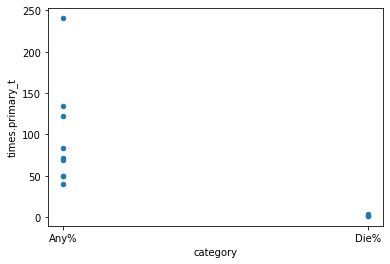

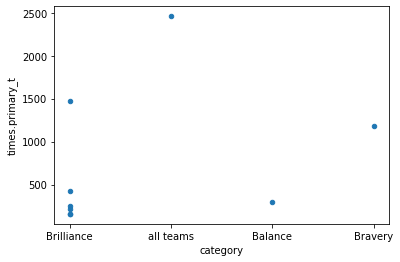

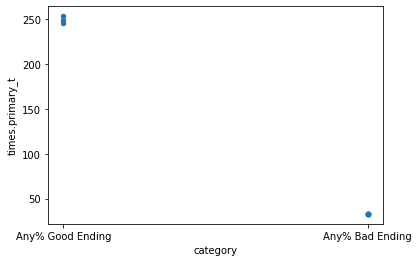

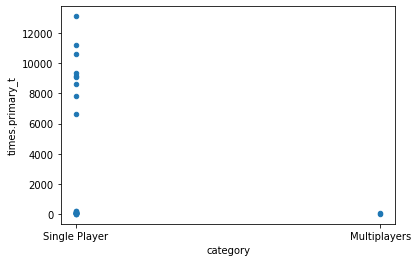

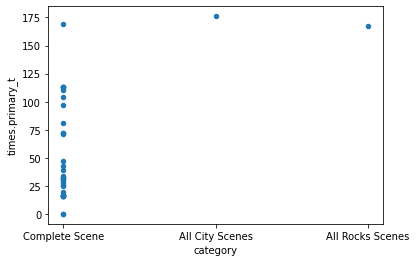

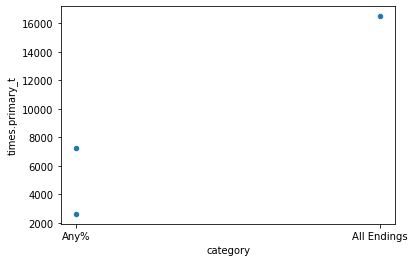

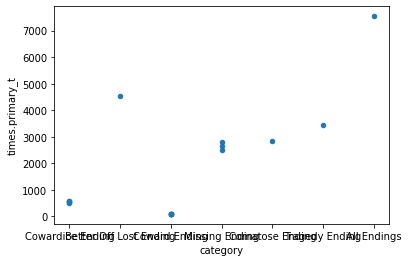

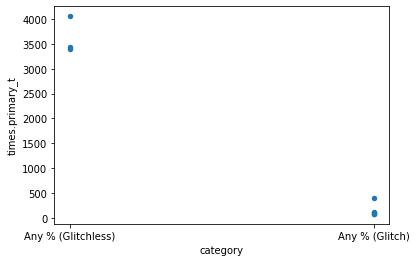

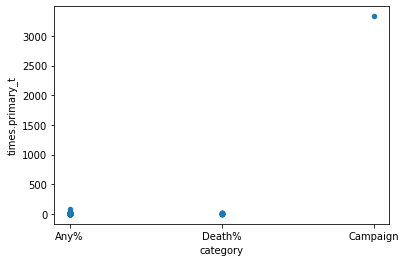

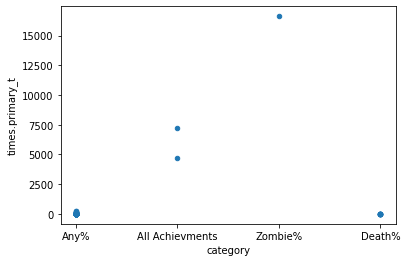

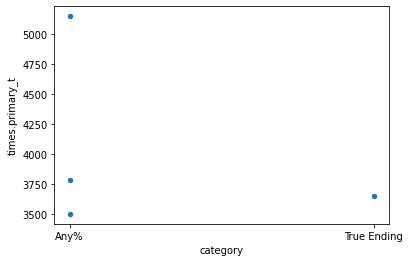

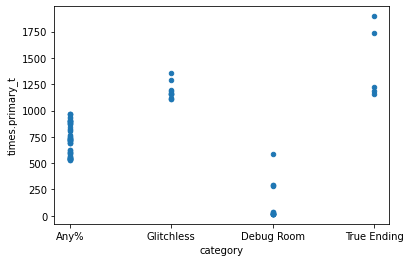

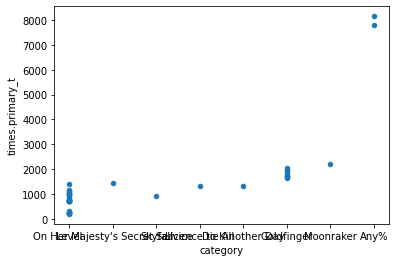

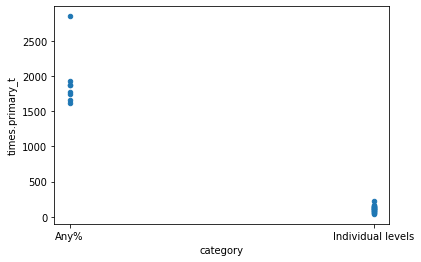

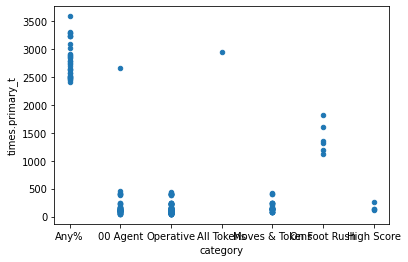

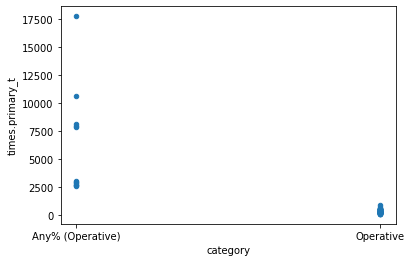

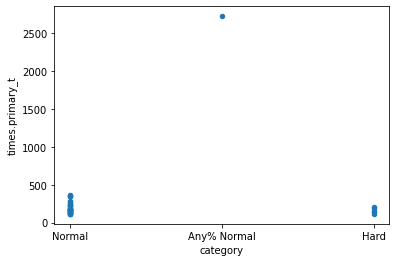

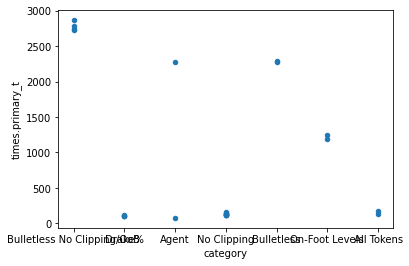

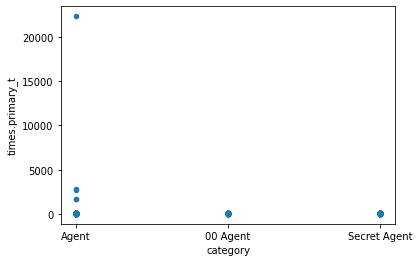

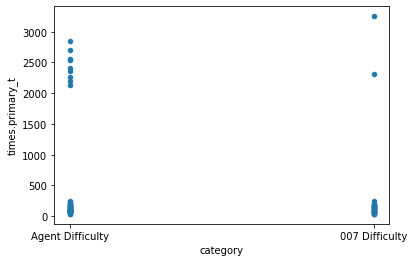

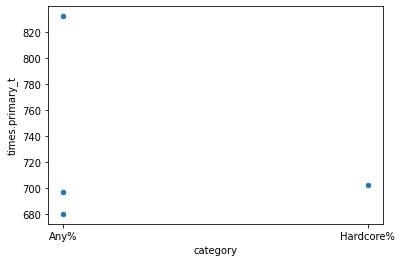

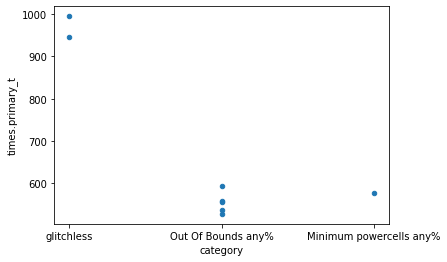

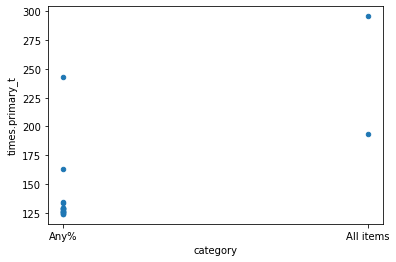

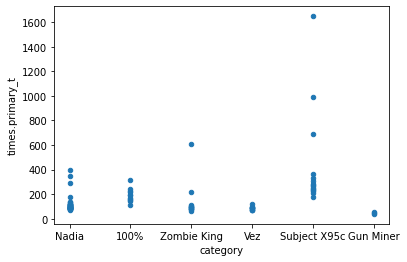

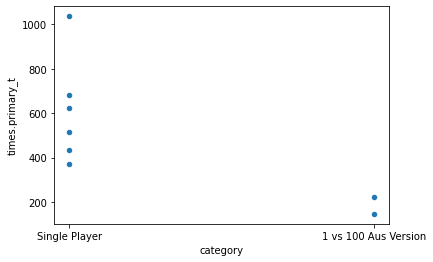

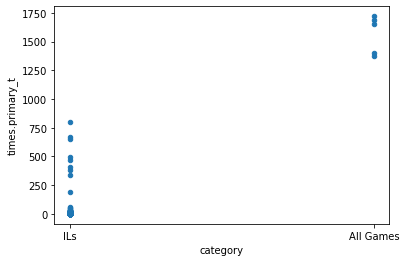

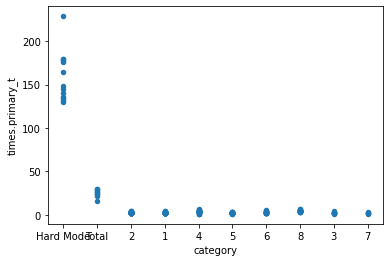

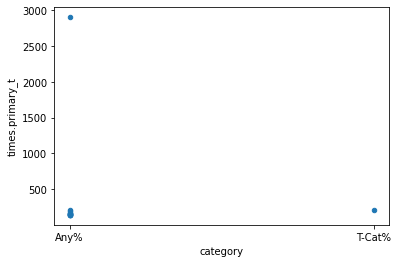

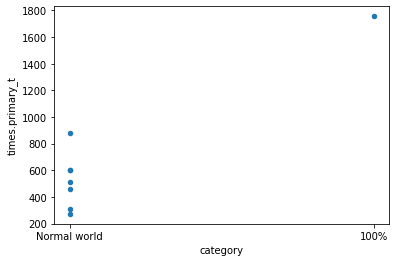

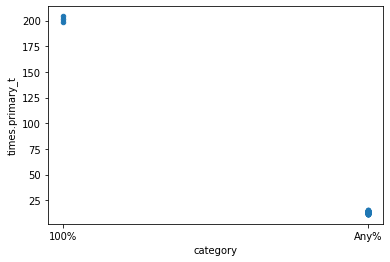

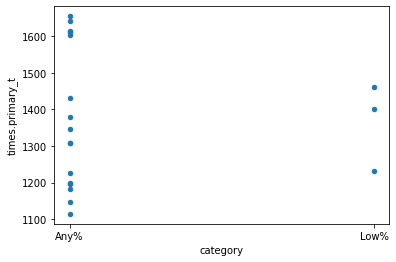

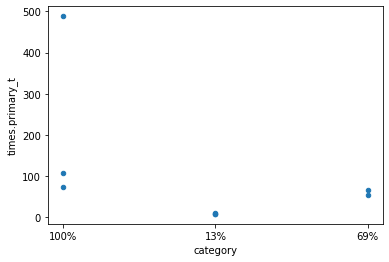

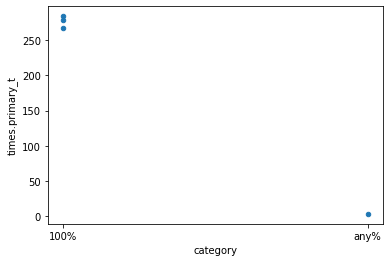

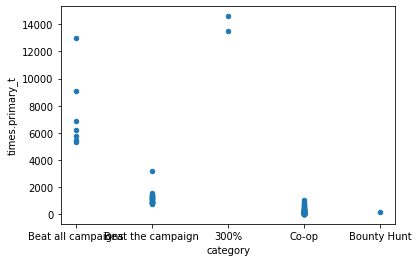

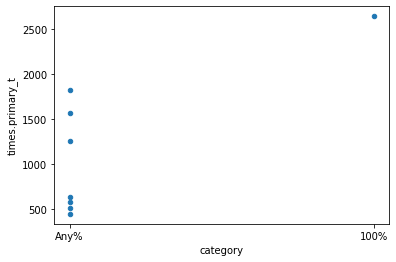

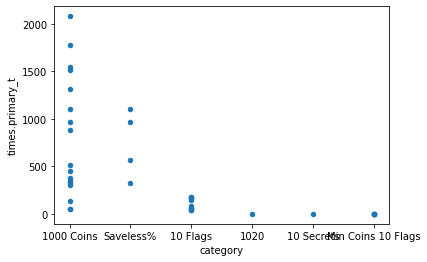

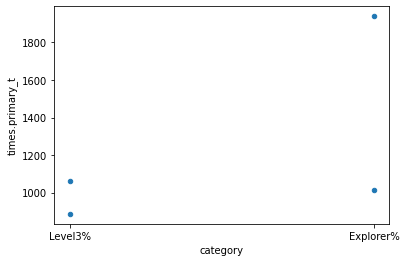

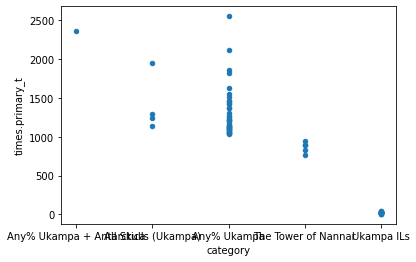

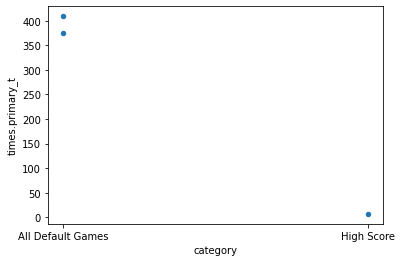

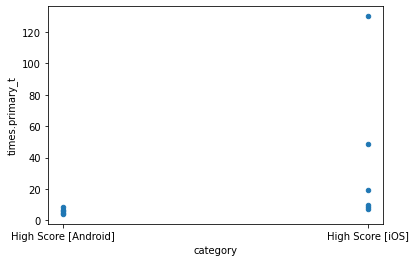

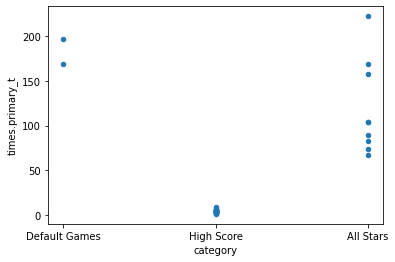

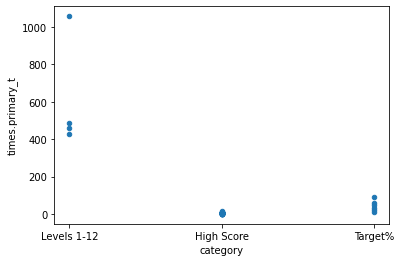

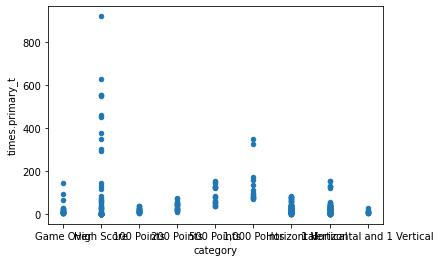

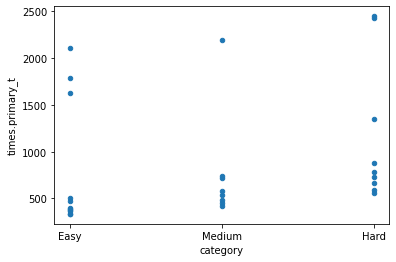

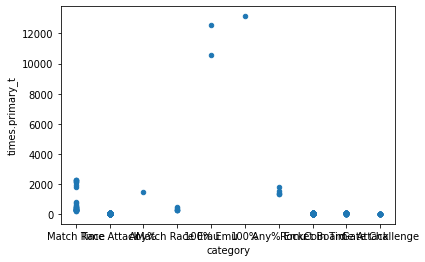

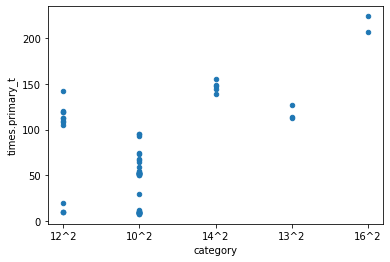

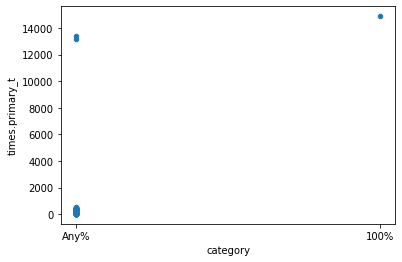

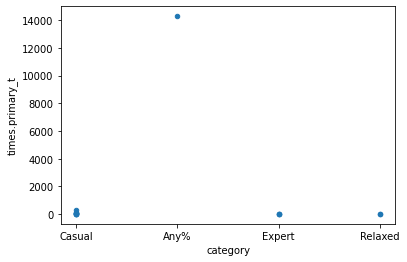

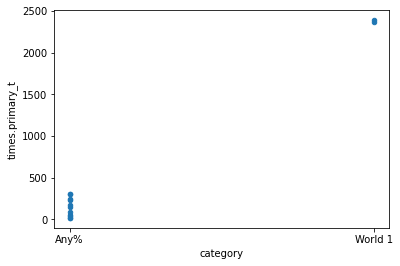

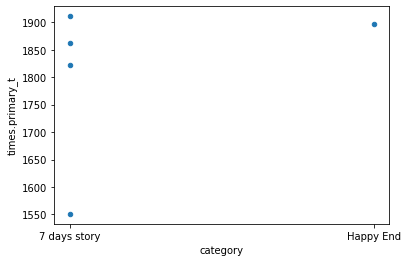

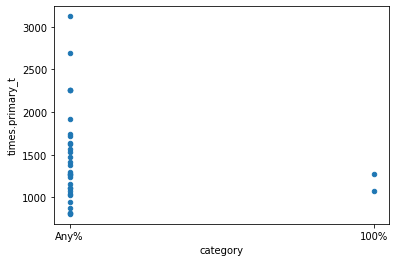

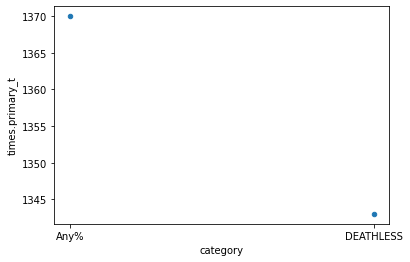

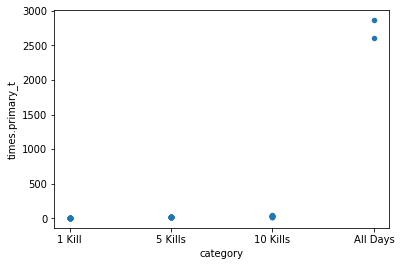

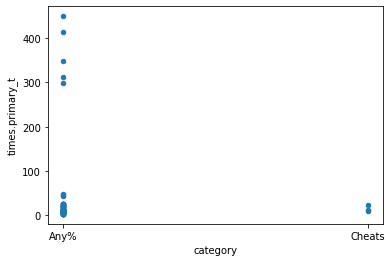

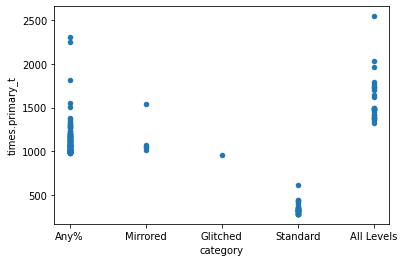

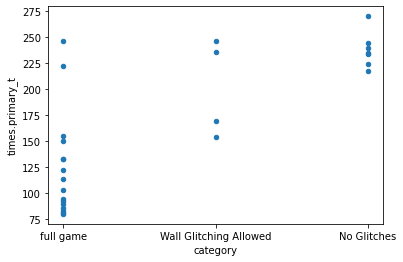

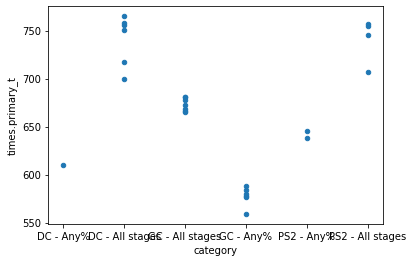

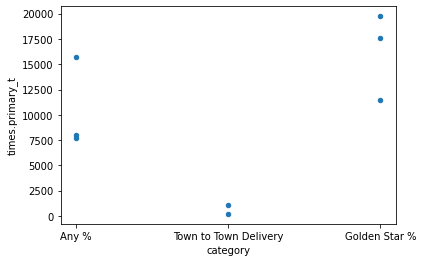

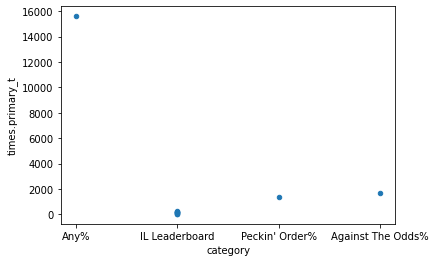

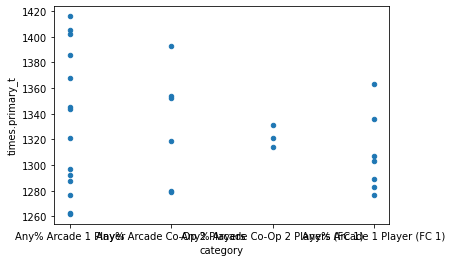

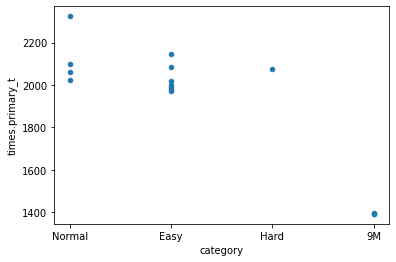

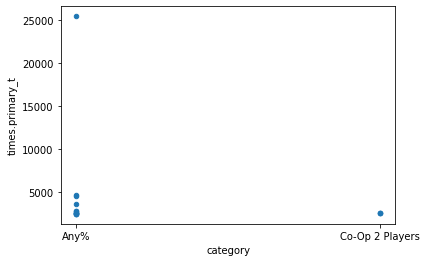

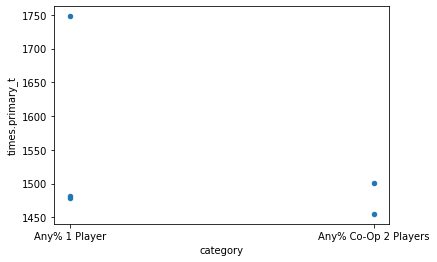

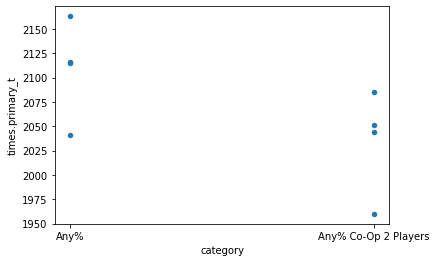

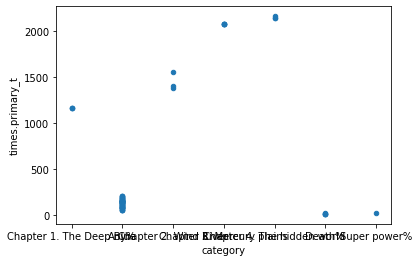

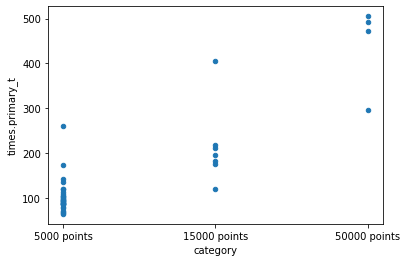

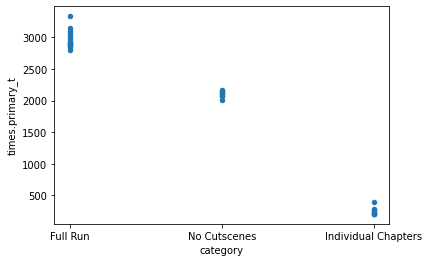

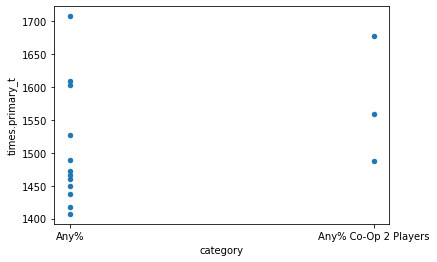

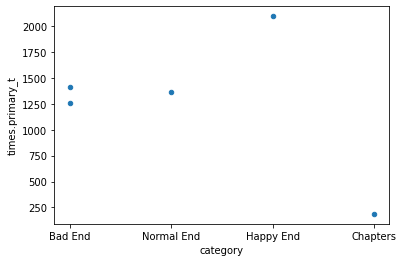

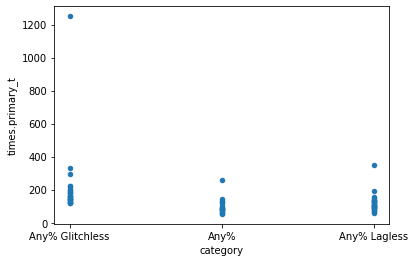

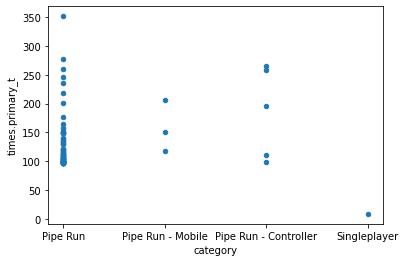

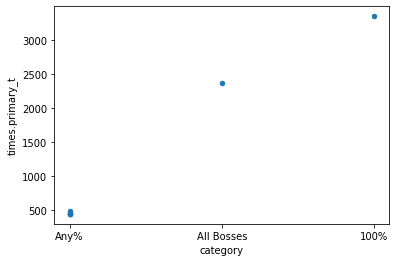

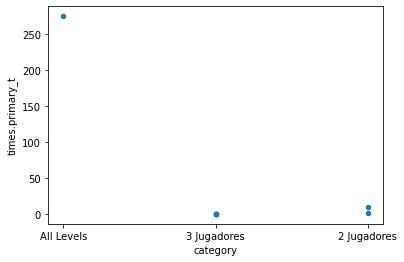

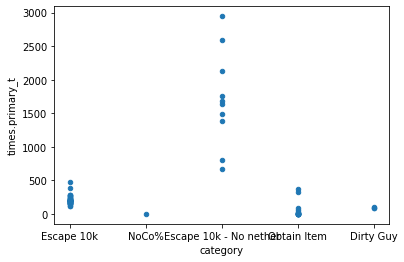

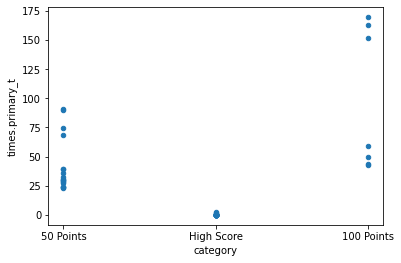

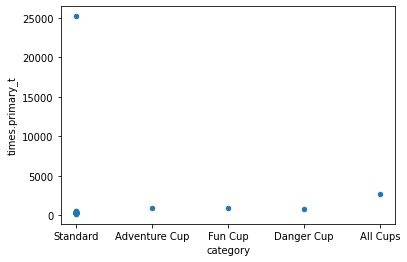

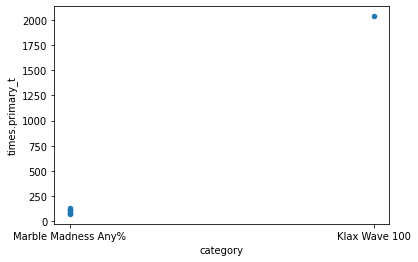

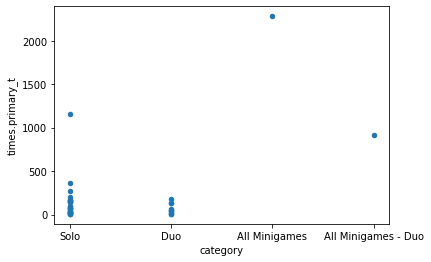

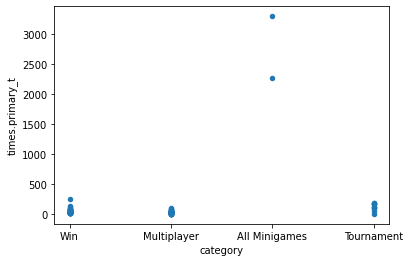

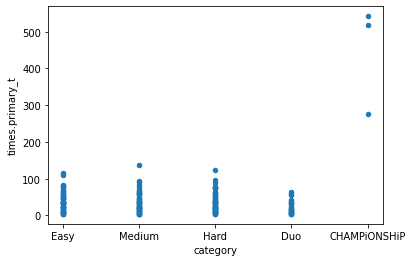

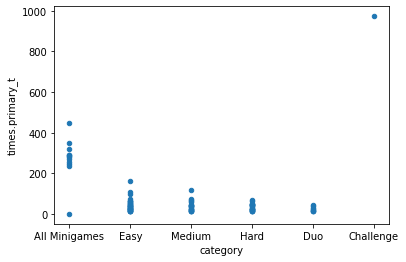

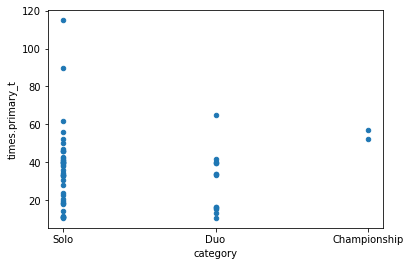

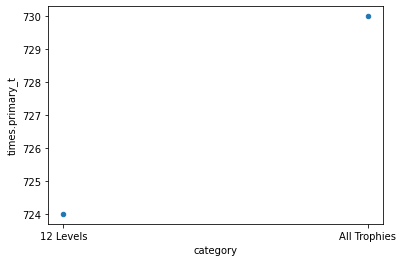

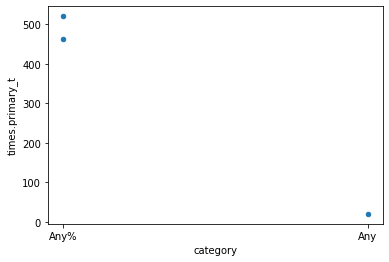

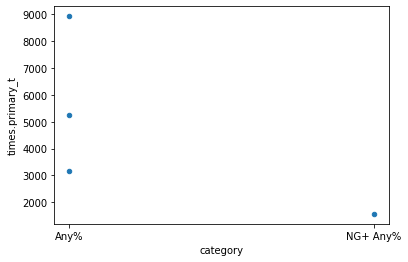

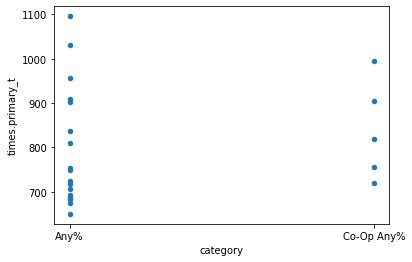

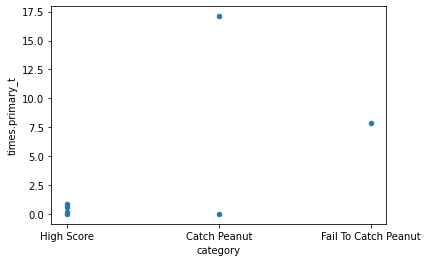

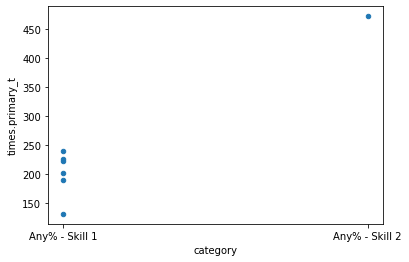

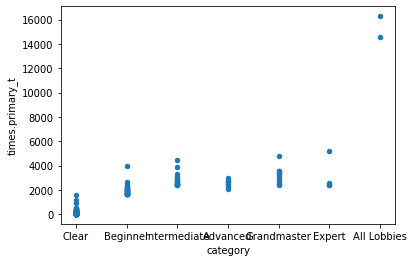

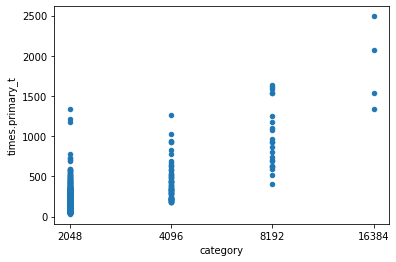

In [ ]:
conds = "(11 > len(x['category'].unique()) > 1)"
tmp_dict = dict(raw_df.groupby('game').apply(lambda x: eval(conds)))

tmp_df = raw_df.copy()

for key, value in tmp_dict.items():
  if value == False:
    tmp_df.drop(tmp_df.loc[raw_df['game'] == key].index, inplace=True)

tmp_df.groupby('game').plot.scatter(x='category', y='times.primary_t')

Boxplots referentes a alguns jogos da série '.hack'

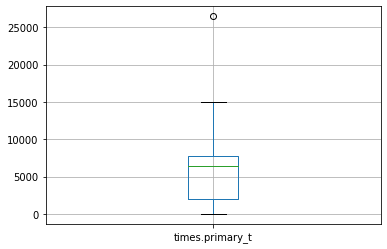

In [ ]:
display(raw_df.loc[raw_df['game'] == '.hack//G.U. Last Recode'].boxplot('times.primary_t'))

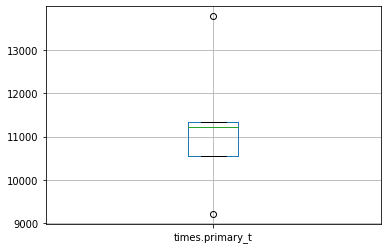

In [ ]:
display(raw_df.loc[raw_df['game'] == '.hack//G.U. Volume 1: Rebirth'].boxplot('times.primary_t'))

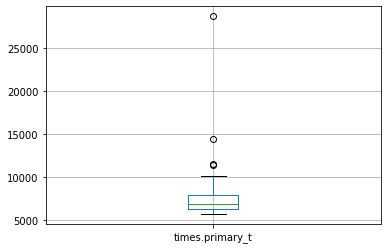

In [ ]:
display(raw_df.loc[raw_df['game'] == '.hack//Infection'].boxplot('times.primary_t'))

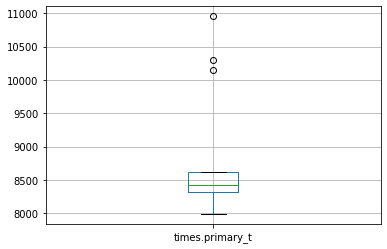

In [ ]:
display(raw_df.loc[raw_df['game'] == '.hack//Mutation'].boxplot('times.primary_t'))

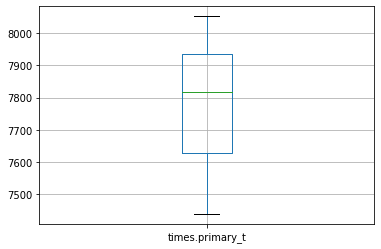

In [ ]:
display(raw_df.loc[raw_df['game'] == '.hack//Outbreak'].boxplot('times.primary_t'))

In [ ]:
type(raw_df['submitted'][0])

str